# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


from ppn2v.unet import UNet
from ppn2v.pn2v import utils
from ppn2v.pn2v import training
from tifffile import imread

# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://zenodo.org/record/5156960/files/Mouse%20skull%20nuclei.zip?download=1. Here we show the pipeline for Mouse skull nuclei dataset. Load the appropriate dataset at an appropriate path. For us, the path is data folder which exists at `../../../`. For Mouse skull nuclei, the data to be denoised is named ```example2_digital_offset300.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse skull nuclei'):
    os.mkdir('../../../data/Mouse skull nuclei')

zipPath="../../../data/Mouse_skull_nuclei.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://zenodo.org/record/5156960/files/Mouse%20skull%20nuclei.zip?download=1', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse skull nuclei")


### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [3]:
path='../../../data/Mouse skull nuclei/'
fileName='example2_digital_offset300.tif'
dataName='mouseskullnuclei' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Mouse Skull Nuclei` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.22907159328460694+-(2SEM)0.025424475890701074      
Epoch 1 finished      
avg. loss: 0.12733786776661873+-(2SEM)0.01951445188516169      
Epoch 2 finished      
avg. loss: 0.12372956350445748+-(2SEM)0.013709291678600058      
Epoch 3 finished      
avg. loss: 0.12535624876618384+-(2SEM)0.014077985966338158      
Epoch 4 finished      
avg. loss: 0.12422441095113754+-(2SEM)0.016283104145387917      
Epoch 5 finished      
avg. loss: 0.11416655443608761+-(2SEM)0.012079205588487381      
Epoch 6 finished      
avg. loss: 0.12384178377687931+-(2SEM)0.012405889228628201      
Epoch 7 finished      
avg. loss: 0.11316472589969635+-(2SEM)0.013435999197050852      
Epoch 8 finished      
avg. loss: 0.11230353489518166+-(2SEM)0.015384143203448613      
Epoch 9 finished      
avg. loss: 0.10817784890532493+-(2SEM)0.012245322064332181      
Epoch 10 finished      
avg. loss: 0.10360654965043067+-(2SEM)0.010245353656514345      
Epoch 11 finished      
avg. los

avg. loss: 0.10927244387567044+-(2SEM)0.010843536122937874      
Epoch 89 finished      
avg. loss: 0.10283617675304413+-(2SEM)0.01041649149118923      
Epoch 90 finished      
avg. loss: 0.10411586090922356+-(2SEM)0.01683307810473748      
Epoch 91 finished      
avg. loss: 0.10194848030805588+-(2SEM)0.014189259645785091      
Epoch 92 finished      
avg. loss: 0.11779680512845517+-(2SEM)0.016145479724113045      
Epoch 93 finished      
avg. loss: 0.09958761855959893+-(2SEM)0.010699837961659549      
Epoch 94 finished      
avg. loss: 0.12101344652473926+-(2SEM)0.017444926331965562      
Epoch 95 finished      
avg. loss: 0.106361847743392+-(2SEM)0.012310662823183351      
Epoch 96 finished      
avg. loss: 0.11332065388560295+-(2SEM)0.013938468721510845      
Epoch 97 finished      
avg. loss: 0.11202381104230881+-(2SEM)0.01733151049353172      
Epoch    97: reducing learning rate of group 0 to 7.8125e-06.
Epoch 98 finished      
avg. loss: 0.10959955919533967+-(2SEM)0.0137834666710

Epoch   174: reducing learning rate of group 0 to 6.1035e-08.
Epoch 175 finished      
avg. loss: 0.10217596963047981+-(2SEM)0.010904685200589547      
Epoch 176 finished      
avg. loss: 0.10351790972054005+-(2SEM)0.013900986713416195      
Epoch 177 finished      
avg. loss: 0.11706717126071453+-(2SEM)0.01545629388422083      
Epoch 178 finished      
avg. loss: 0.098201210424304+-(2SEM)0.014510526749737955      
Epoch 179 finished      
avg. loss: 0.10208021812140941+-(2SEM)0.011933707644187866      
Epoch 180 finished      
avg. loss: 0.1088487010449171+-(2SEM)0.015219759752220792      
Epoch 181 finished      
avg. loss: 0.10609817896038294+-(2SEM)0.015364888234512023      
Epoch 182 finished      
avg. loss: 0.10829888731241226+-(2SEM)0.014247536315333799      
Epoch 183 finished      
avg. loss: 0.11662178225815296+-(2SEM)0.014746057602383239      
Epoch 184 finished      
avg. loss: 0.10182455573230982+-(2SEM)0.013416705763339325      
Epoch 185 finished      
avg. loss: 0.1101

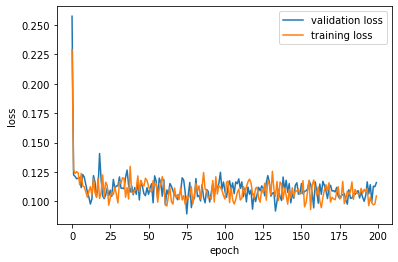

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()